In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import pearsonr, linregress


# Impor the OpenWeatherMap API key
from keys.api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url=f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | severo-yeniseyskiy
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | mugia
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | robore
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | tsiombe
Processing Record 16 of Set 1 | carovigno
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | mossel bay
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | kurumkan
Processing Record 22 of Set 1 | hamilton
Processi

Processing Record 38 of Set 4 | afaahiti
Processing Record 39 of Set 4 | am djarass
City not found. Skipping...
Processing Record 40 of Set 4 | aykhal
Processing Record 41 of Set 4 | isafjordur
Processing Record 42 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 4 | vila do maio
Processing Record 44 of Set 4 | yeppoon
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | wad medani
Processing Record 47 of Set 4 | asaita
Processing Record 48 of Set 4 | vernon
Processing Record 49 of Set 4 | masterton
Processing Record 0 of Set 5 | yangor
City not found. Skipping...
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | sao paulo de olivenca
Processing Record 3 of Set 5 | sirte
Processing Record 4 of Set 5 | warman
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | port mathurin
Processing Record 7 of Set 5 | atafu village
Processing Record 8 of Set 5 | rawson
Processing Record 9 of Set 5 | borongan

Processing Record 28 of Set 8 | lazaro cardenas
Processing Record 29 of Set 8 | aljezur
Processing Record 30 of Set 8 | boyolangu
Processing Record 31 of Set 8 | oodweyne
Processing Record 32 of Set 8 | espargos
City not found. Skipping...
Processing Record 33 of Set 8 | glace bay
Processing Record 34 of Set 8 | wamba
Processing Record 35 of Set 8 | vila franca do campo
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | san patricio
Processing Record 38 of Set 8 | alaghsas
Processing Record 39 of Set 8 | marapanim
Processing Record 40 of Set 8 | filey
Processing Record 41 of Set 8 | prado
Processing Record 42 of Set 8 | axminster
Processing Record 43 of Set 8 | zaragoza
Processing Record 44 of Set 8 | torokszentmiklos
Processing Record 45 of Set 8 | akrehamn
Processing Record 46 of Set 8 | kolomyia
Processing Record 47 of Set 8 | minas
Processing Record 48 of Set 8 | kanchanaburi
Processing Record 49 of Set 8 | arraial do cabo
Processing Record 0 of Set 9 | novyy 

Processing Record 16 of Set 12 | siwa oasis
Processing Record 17 of Set 12 | guararapes
Processing Record 18 of Set 12 | minot air force base
Processing Record 19 of Set 12 | jayrud
Processing Record 20 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 21 of Set 12 | turpan
Processing Record 22 of Set 12 | san andres
Processing Record 23 of Set 12 | jam sahib
Processing Record 24 of Set 12 | amet
Processing Record 25 of Set 12 | ust-kamenogorsk
Processing Record 26 of Set 12 | myrina
Processing Record 27 of Set 12 | gazojak
Processing Record 28 of Set 12 | peniche
Processing Record 29 of Set 12 | uaboe
City not found. Skipping...
Processing Record 30 of Set 12 | malango
Processing Record 31 of Set 12 | sangju
Processing Record 32 of Set 12 | westport
Processing Record 33 of Set 12 | sinazongwe
Processing Record 34 of Set 12 | shenjiamen
Processing Record 35 of Set 12 | lorengau
Processing Record 36 of Set 12 | narrabri
Processing Record 37 of Set 12 | souillac
Processin

In [14]:
# # Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()


City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,27.83,46,20,0.00,CA,1693255583
1,severo-yeniseyskiy,60.3725,93.0408,12.89,88,100,2.05,RU,1693256023
2,laguna,38.4210,-121.4238,37.41,28,0,2.57,US,1693256023
3,tiksi,71.6872,128.8694,6.38,88,100,0.46,RU,1693256023
4,mugia,43.1041,-9.2179,18.84,84,93,5.30,ES,1693256023


In [17]:
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,27.83,46,20,0.00,CA,1693255583
1,severo-yeniseyskiy,60.3725,93.0408,12.89,88,100,2.05,RU,1693256023
2,laguna,38.4210,-121.4238,37.41,28,0,2.57,US,1693256023
3,tiksi,71.6872,128.8694,6.38,88,100,0.46,RU,1693256023
4,mugia,43.1041,-9.2179,18.84,84,93,5.30,ES,1693256023


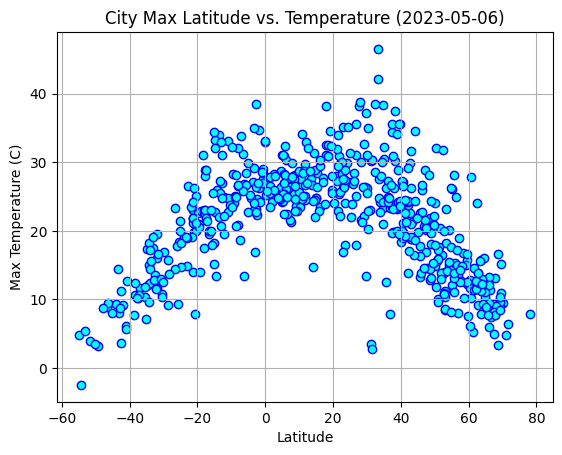

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker = "o", c = "#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-06)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

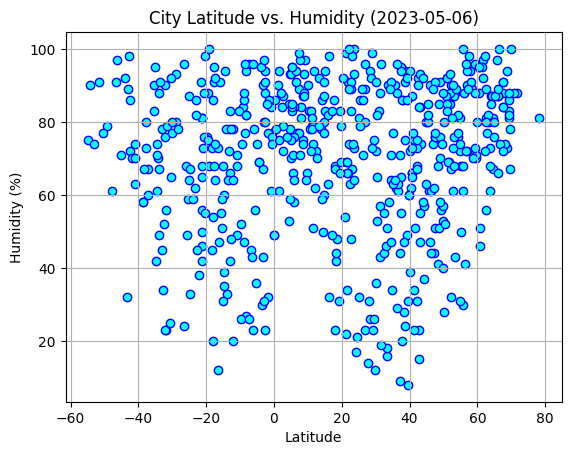

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", c ="#00FFFF", edgecolor = "b")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-05-06)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

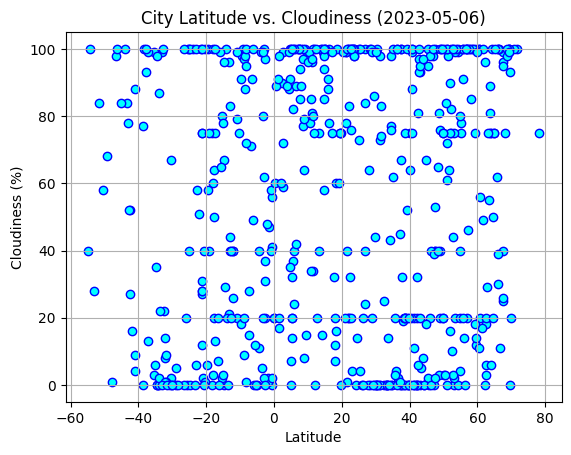

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker = "o", c ="#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-05-06)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

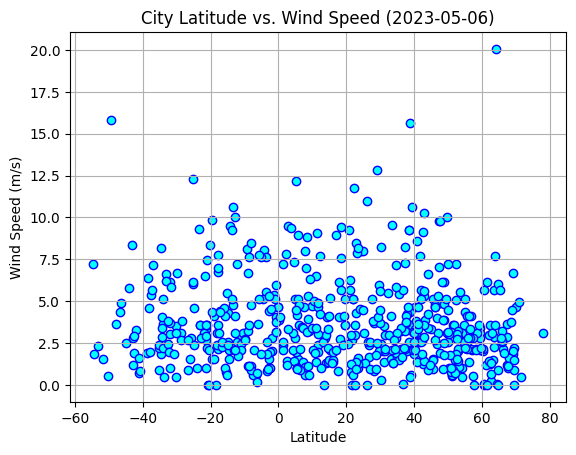

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", c ="#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-05-06)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

In [32]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,27.83,46,20,0.00,CA,1693255583
1,severo-yeniseyskiy,60.3725,93.0408,12.89,88,100,2.05,RU,1693256023
2,laguna,38.4210,-121.4238,37.41,28,0,2.57,US,1693256023
3,tiksi,71.6872,128.8694,6.38,88,100,0.46,RU,1693256023
4,mugia,43.1041,-9.2179,18.84,84,93,5.30,ES,1693256023


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,geraldton,-28.7667,114.6000,9.23,93,0,3.09,AU,1693256023
7,edinburgh of the seven seas,-37.0676,-12.3116,11.73,67,13,7.17,SH,1693256023
9,chonchi,-42.6128,-73.8092,11.18,72,52,1.90,CL,1693256024
11,saint-philippe,-21.3585,55.7679,21.77,81,31,3.32,RE,1693256024
12,robore,-18.3333,-59.7500,31.05,45,0,0.00,BO,1693256024


The r-value is: -0.6840646176467284


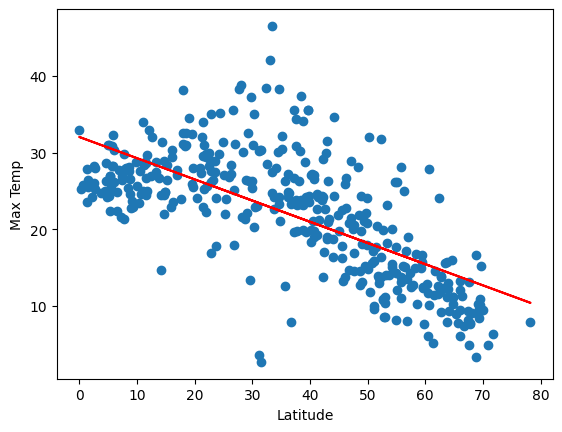

In [35]:
# Linear regression on Northern Hemisphere

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(5,-10))

The r-value is: 0.8357376976413798


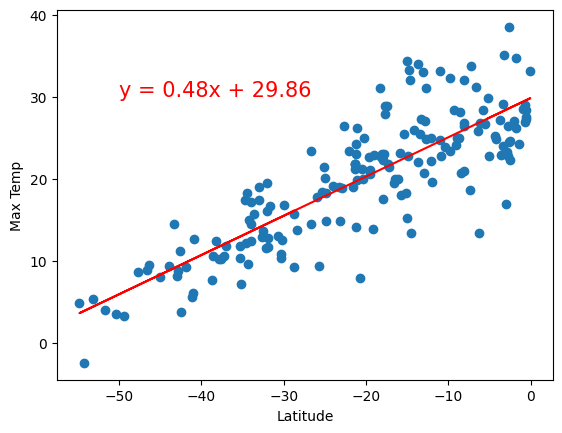

In [36]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-50,30))

The r-value is: 0.04674715774221527


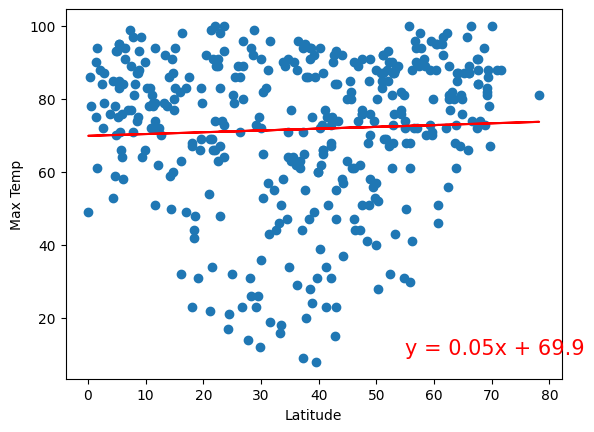

In [37]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (55, 10))

The r-value is: -0.10945808933398847


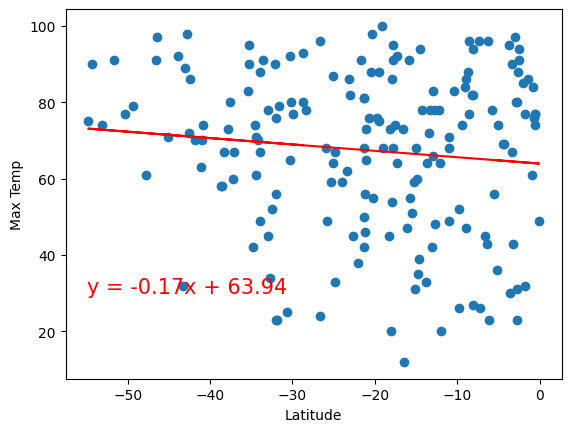

In [38]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 30))

The r-value is: -0.06048178421403998


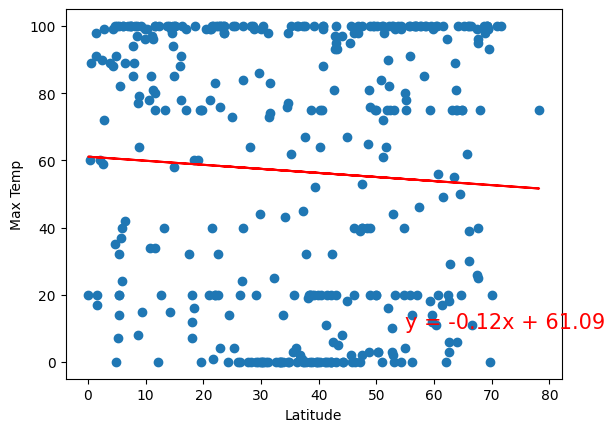

In [39]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (55, 10))

The r-value is: -0.033615804603151736


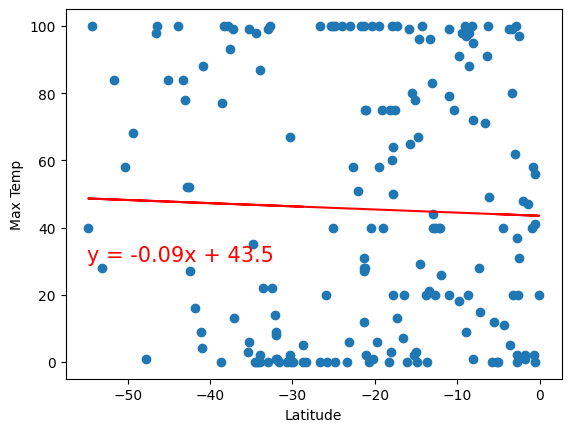

In [40]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-55, 30))

The r-value is: -0.1286005423251758


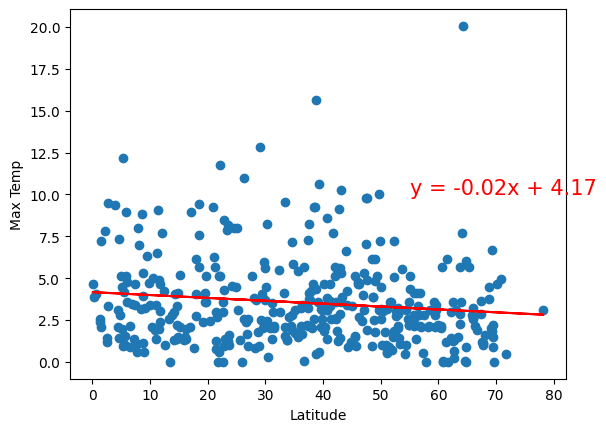

In [41]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (55, 10))

The r-value is: -0.01998655691525144


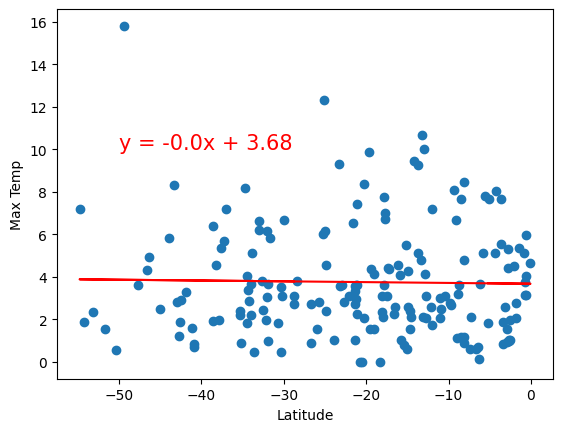

In [42]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50, 10))